<center>
    
# Project: CRIME INCIDENT REPORTS 
### Jiangyun Wang <br> Northeastern University, Boston, MA, USA
</center>

--- 
<center>
    
### Abstract
**Summary:**

The project is to investigate crime incidents in Boston. Since Boston Police Department (BPD) with limited resources, the report aims to provide some recommendations to help BPD manage the distribution of available police resources effectively. In order to achive the goal, the project will analyze in three different directions: relation of time and crime incident numbers, relation of offense group and crime incident numbers, and relation of location and crime incident numbers.

**Data Sources:**

This project includes two data sources: *tmp59ldga_d.csv* and *rmsoffensecodes.xlsx*, both of which are from the Boston government website -- *Analyze Boston*[4]. The primary source of data is *tmp59ldga d.csv* issued by BPD, which reports the preliminary details of an incident to BPD officers are reacting to. This dataset contains multiple columns: incidents id, Offense type, offense group, date, duration, place and so on. Records start in June 2015 to now. Another data source, *rmsoffensecodes.xlsx*, documents the realtionship between offense code and offense description.


**Key Conclusions:**

The project finds some specific patterns, which might help BPD reasonably deploy available police resources based on the Bostonian specities of time, locations, and offense groups and improve their effectiveness of resolving cases of crime. 

</center> 

### Introduction
**Explanation:**

The project is about to analyze when and where is the high frequency of crime incidents occurred in Boston, which are the most common incidents that happens in Boston. It can help BPD deploy reasonable police resources and enhance the effectiveness of BPD in resolving cases of crime.

**Goals:**

1. Relation of time and crime incident numbers
    - Months
    - Seasons
    - Day of week
1. Relation of offense group and crime incident numbers
    - Motor Vehicle Accident Response
    - Larceny
1. Relation of location and crime incident numbers.
    - WASHINGTON ST


### Methodology
- Step-by-Step:
    1. A module *pandas* helps to import data sources. Moreover, pandas is a powerful module in Python, whose functionalities include extracting, grouping, sorting, converting, and plotting. It will be more convenient to plot by columns and list or dict.
    1. loc is frequently used in the project, because it helps to get the specific columns and filter out redundent data.
    1. Both data sources come from the Boston government website -- *Analyze Boston*
    1. There are some researches in the project and their citations are at the end of the project
- Modules are imported and show below:

In [31]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import copy

- Key code fragments:

In [32]:
# import data sources 
INCIDENTS = pd.read_csv('tmp59ldga_d.csv')
CODES = pd.read_excel('rmsoffensecodes.xlsx')

In [33]:
# data
SPRING = [3,4,5]

SUMMER = [6,7,8]
FALL = [9,10,11]
WINTER = [12,1,2]
MONTHS = [i+1 for i in range(12)]
DISTRICT = {'A1':'Downtown',
'A15':'Charlestown',
'A7':'East Boston',
'B2':'Roxbury',
'B3':'Mattapan',
'C6': 'South Boston',
'C11': 'Dorchester',
'D4': 'South End',
'D14': 'Brighton',
'E5':'West Roxbury',
'E13': 'Jamaica Plain',
'E18': 'Hyde Park'}
TCOLORS = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']
# a list of abbr. of months
X = ['JAN', "FEB",'MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

In [34]:
# Get the data by each year
SIXTEEN = INCIDENTS.loc[INCIDENTS['YEAR']==2016,:]
SEVENTEEN = INCIDENTS.loc[INCIDENTS['YEAR']==2017,:]
EIGHTEEN = INCIDENTS.loc[INCIDENTS['YEAR']==2018,:]
NINETEEN = INCIDENTS.loc[INCIDENTS['YEAR']==2019,:]

# sorted by the months
# FIVETEEN = INCIDENTS.loc[INCIDENTS['YEAR']==2015,:].groupby('MONTH', as_index=False)['INCIDENT_NUMBER'].size().tolist()
SIXTEENMONTH = INCIDENTS.loc[INCIDENTS['YEAR']==2016,:].groupby('MONTH', as_index=False)['INCIDENT_NUMBER'].size().tolist()
SEVENTEENMONTH = INCIDENTS.loc[INCIDENTS['YEAR']==2017,:].groupby('MONTH', as_index=False)['INCIDENT_NUMBER'].size().tolist()
EIGHTEENMONTH = INCIDENTS.loc[INCIDENTS['YEAR']==2018,:].groupby('MONTH', as_index=False)['INCIDENT_NUMBER'].size().tolist()
NINETEENMONTH = INCIDENTS.loc[INCIDENTS['YEAR']==2019,:].groupby('MONTH', as_index=False)['INCIDENT_NUMBER'].size().tolist()

### Functionality

In [38]:
# funtion to display value on the top
def setTop(axs, y):
    rects = axs.patches
    for rect, label in zip(rects, y):
        height = rect.get_height()
        axs.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom')


# To plot a bar with a specific color
def bar_plot(bg, y,year):
    bar = bg.bar(X, y, alpha=0.8)
#     set each bar's color
    bar[0].set_color('blue')
    bar[1].set_color('blue')
    bar[2].set_color('green')
    bar[3].set_color('green')
    bar[4].set_color('green')
    bar[5].set_color('red')
    bar[6].set_color('red')
    bar[7].set_color('red')
    bar[8].set_color('yellow')
    bar[9].set_color('yellow')
    bar[10].set_color('yellow')
    bar[11].set_color('blue')

    bg.set_ylabel("Total Incident Numbers")
    bg.set_title("Total incident numbers in each month in "+str(year));
    bg.grid(color='grey', linestyle='--', linewidth=1)

    setTop(bg, y)
    
# count the total incidents based on the seasons
def season_incident(year_data):
    seasons = [sum(year_data[2:5]),sum(year_data[5:8]),sum(year_data[8:11]),year_data[11]+year_data[2]+year_data[1]]
    return seasons

def season_plot(bg, year_data, year):
    Y = season_incident(year_data)
    bar = bg.bar(X, Y)
    bar[0].set_color('green')
    bar[1].set_color('red')
    bar[2].set_color('yellow')
    bar[3].set_color('blue')

    bg.set_ylabel("Total Incident Numbers")
    bg.set_title("Total incident numbers in each season in " +str(year));
    bg.grid(color='grey', linestyle='--', linewidth=1)
    setTop(bg, Y)
    
# we want to analyze which are top n most frequent incidents in the given month
def fre_inc_seasons(year_data, n):
    seasons_incidents = []
    
    
    for s in [SPRING,SUMMER,FALL,WINTER]:
        season_inc ={}
        for i in s:
            cur_month = year_data.loc[year_data['MONTH']==i,:].groupby('OFFENSE_CODE_GROUP', as_index=False)['INCIDENT_NUMBER'].size().to_dict()
            for inci in cur_month:
                if inci in season_inc:
                    season_inc[inci]+=cur_month[inci]
                else:
                    season_inc[inci]=cur_month[inci]
        tuples = sorted(season_inc.items(), key=lambda kv: kv[1], reverse=True)
        seasons_incidents.append(tuples[:n])  
    return seasons_incidents

# count the occurance of each key
def count_val(dict, source):
    for s in source:
        dict[s]+=1
    return dict

# get the value by each season
def get_season(pandas, season):
    a = []
    if season == 1:
        a = pandas.loc[pandas['MONTH']>2,:]
        a = a.loc[a['MONTH']<6,:]
    elif season  == 2:
        a = pandas.loc[pandas['MONTH']>5,:]
        a = a.loc[a['MONTH']<9,:]
    elif season  == 3:
        a = pandas.loc[pandas['MONTH']>8,:]
        a = a.loc[a['MONTH']<12,:]
    elif season  == 4:
        c = pandas['MONTH']<3
        b = pandas['MONTH']==12
        a = pandas[c | b]
    return a

### Analysis and Results

- **Relation of Time and Crime Incident Numbers**
    1. Months
    1. Seasons
    1. Day of week
    
<center>    
Four colors are to represent four seasons:
 
| Season |  Color |
|:------:|:------:|
| Spring |  green |
| Summer |   red  |
|  Fall  | yellow |
| Winter |  blue  |

</center>


*1. Months*

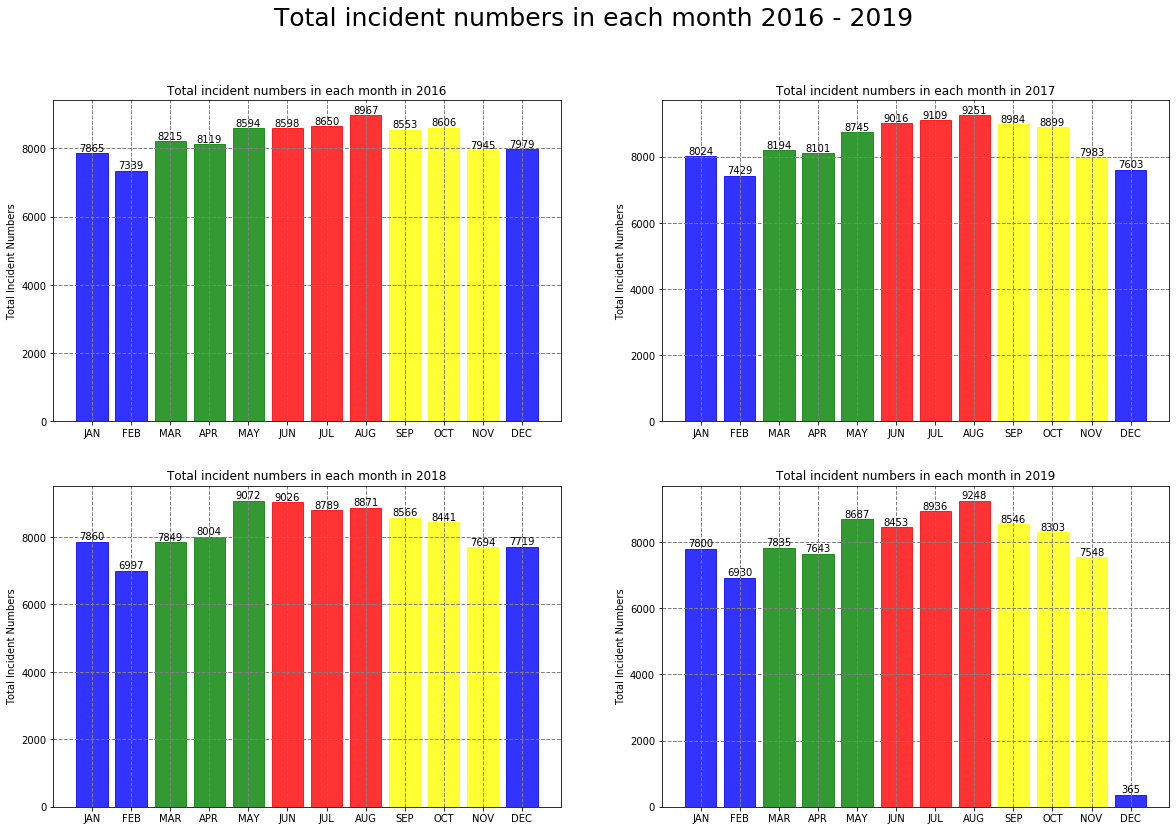

In [40]:
# plot the graph
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(20, 13)
plt.suptitle("Total incident numbers in each month 2016 - 2019", fontsize=25)
       
# graph 1    
bar_plot(ax1, SIXTEENMONTH,2016)
# graph 2
bar_plot(ax2, SEVENTEENMONTH,2017)
# graph 3
bar_plot(ax3, EIGHTEENMONTH,2018)
# graph 4
bar_plot(ax4, NINETEENMONTH,2019)

> - Since the project is done in Dec. 2019, it causes an error by using the data in 2019(which only contains partial data of December) right now. Thus, the following analysis only focuses on 2016 - 2018
- From May to October, there are always more than 8000 incidents happen monthly.
- The February is always the month with the least crime incident numbers
- Hypothesis: the total incident numbers might related with the seasons

*2. Seasons*

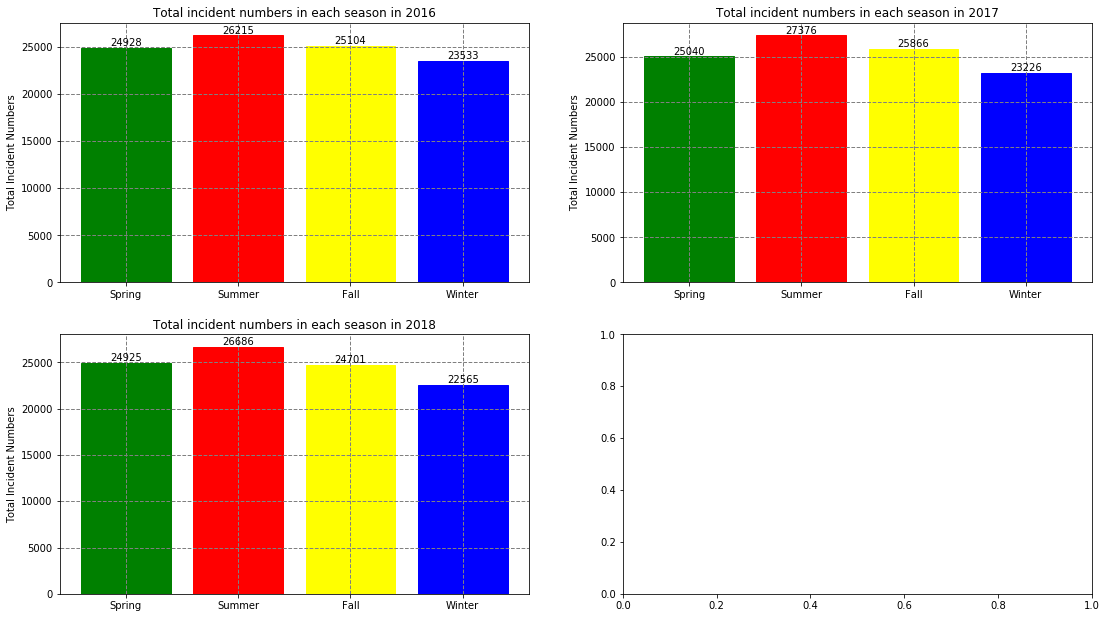

In [41]:
# plot the graph
X = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
# fig.suptitle("Issuers: The amount of health plans v.s. Premium Adult Individual Age 21\n")

# graph 1
# bar_plot(ax1, FIVETEEN)
       
# graph 2    
season_plot(ax1, SIXTEENMONTH,2016)

# graph 3
season_plot(ax2, SEVENTEENMONTH,2017)
season_plot(ax3, EIGHTEENMONTH,2018)

> - From the graph, Summer has the most incident numbers and Winter has the least incident numbers.
- Hypothesis (for future study): the reason why Winter has the least incident numbers is because the geography of Boston. Boston is in the north-east of USA, which is snowy and chilly in winter, thus people in Boston prefer or have to stay at home in Winter. Therefore, severe weather condition might reduce the crime incident numbers
- How about incidents numbers in day of week? Will it has a specific pattern?

*3. Day of Week*

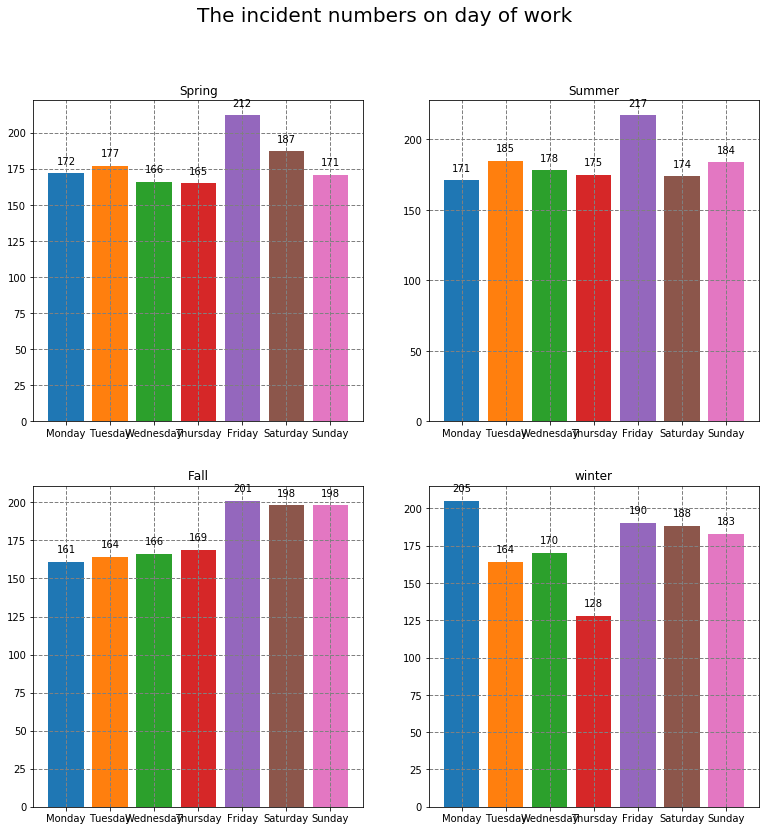

In [8]:
days=EIGHTEEN.loc[EIGHTEEN['OFFENSE_CODE']==3831]
days_spr = get_season(days, 1)['DAY_OF_WEEK'].values.tolist()
days_sum = get_season(days, 2)['DAY_OF_WEEK'].values.tolist()
days_fal = get_season(days, 3)['DAY_OF_WEEK'].values.tolist()
days_win = get_season(days, 4)['DAY_OF_WEEK'].values.tolist()

days_spr_dict = {'Monday':0,'Tuesday':0,'Wednesday':0, 'Thursday':0, 'Friday':0,'Saturday':0, 'Sunday':0}
days_sum_dict = {'Monday':0,'Tuesday':0,'Wednesday':0, 'Thursday':0, 'Friday':0,'Saturday':0, 'Sunday':0}
days_fal_dict = {'Monday':0,'Tuesday':0,'Wednesday':0, 'Thursday':0, 'Friday':0,'Saturday':0, 'Sunday':0}
days_win_dict = {'Monday':0,'Tuesday':0,'Wednesday':0, 'Thursday':0, 'Friday':0,'Saturday':0, 'Sunday':0}

days_spr_dict = count_val(days_spr_dict, days_spr)
days_sum_dict = count_val(days_sum_dict, days_sum)
days_fal_dict = count_val(days_fal_dict, days_fal)
days_win_dict = count_val(days_win_dict, days_win)

X = days_spr_dict.keys()
SEASONS = ['Spring', 'Summer', 'Fall', "winter"]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,13))
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.set_size_inches(18.5, 10.5)
# define the plots as before, for all four 'axes'
ax1.bar(X, days_spr_dict.values(), color='green')
ax2.bar(X, days_sum_dict.values(), color='red')
ax3.bar(X, days_fal_dict.values(), color='yellow')
ax4.bar(X, days_win_dict.values(), color='blue')

bar1 = ax1.bar(X, days_spr_dict.values(),color=TCOLORS)
# bar1[0].set_color('green')
# bar1[1].set_color('red')
# bar1[2].set_color('yellow')
# bar1[3].set_color('blue')

ax1.set_title(SEASONS[0]);
ax1.grid(color='grey', linestyle='--', linewidth=1)


bar2 = ax2.bar(X, days_sum_dict.values(),color=TCOLORS)

ax2.set_title(SEASONS[1]);
ax2.grid(color='grey', linestyle='--', linewidth=1)



bar3 = ax3.bar(X, days_fal_dict.values(),color=TCOLORS)


ax3.set_title(SEASONS[2]);
ax3.grid(color='grey', linestyle='--', linewidth=1)


bar4 = ax4.bar(X, days_win_dict.values(),color=TCOLORS)


ax4.set_title(SEASONS[3]);
ax4.grid(color='grey', linestyle='--', linewidth=1)


plt.suptitle("The incident numbers on day of work", fontsize=20)
setTop(ax1, days_spr_dict.values())
setTop(ax2, days_sum_dict.values())
setTop(ax3, days_fal_dict.values())
setTop(ax4, days_win_dict.values())

> - The day of Friday in Spring, Summer, and Fall occurs more crime incidents. And the day of Monday in Winter occurs more incidents.
- Generally, there is less incidents happened from Tuesday to Thursday in each season.

>**Suggestion:** BPD can reasonably deploy the police on each day of week to avoid wasting the police or the shortage of the police on the crime scene.

>- How about the top 5 offence groups which have the most incident numbers in each season in 2018 (the latest year with 12 months data)？

- **Relation of offense group and crime incident numbers**

In [9]:
# we will draw the number of incidents each season
season_data = fre_inc_seasons(EIGHTEEN, 5)
spring_top_5_name = [pair[0] for pair in season_data[0]]
summer_top_5_name = [pair[0] for pair in season_data[1]]
fall_top_5_name = [pair[0] for pair in season_data[2]]
winter_top_5_name = [pair[0] for pair in season_data[3]]

spring_top_5_val = [pair[1] for pair in season_data[0]]
summer_top_5_val = [pair[1] for pair in season_data[1]]
fall_top_5_val = [pair[1] for pair in season_data[2]]
winter_top_5_val = [pair[1] for pair in season_data[3]]

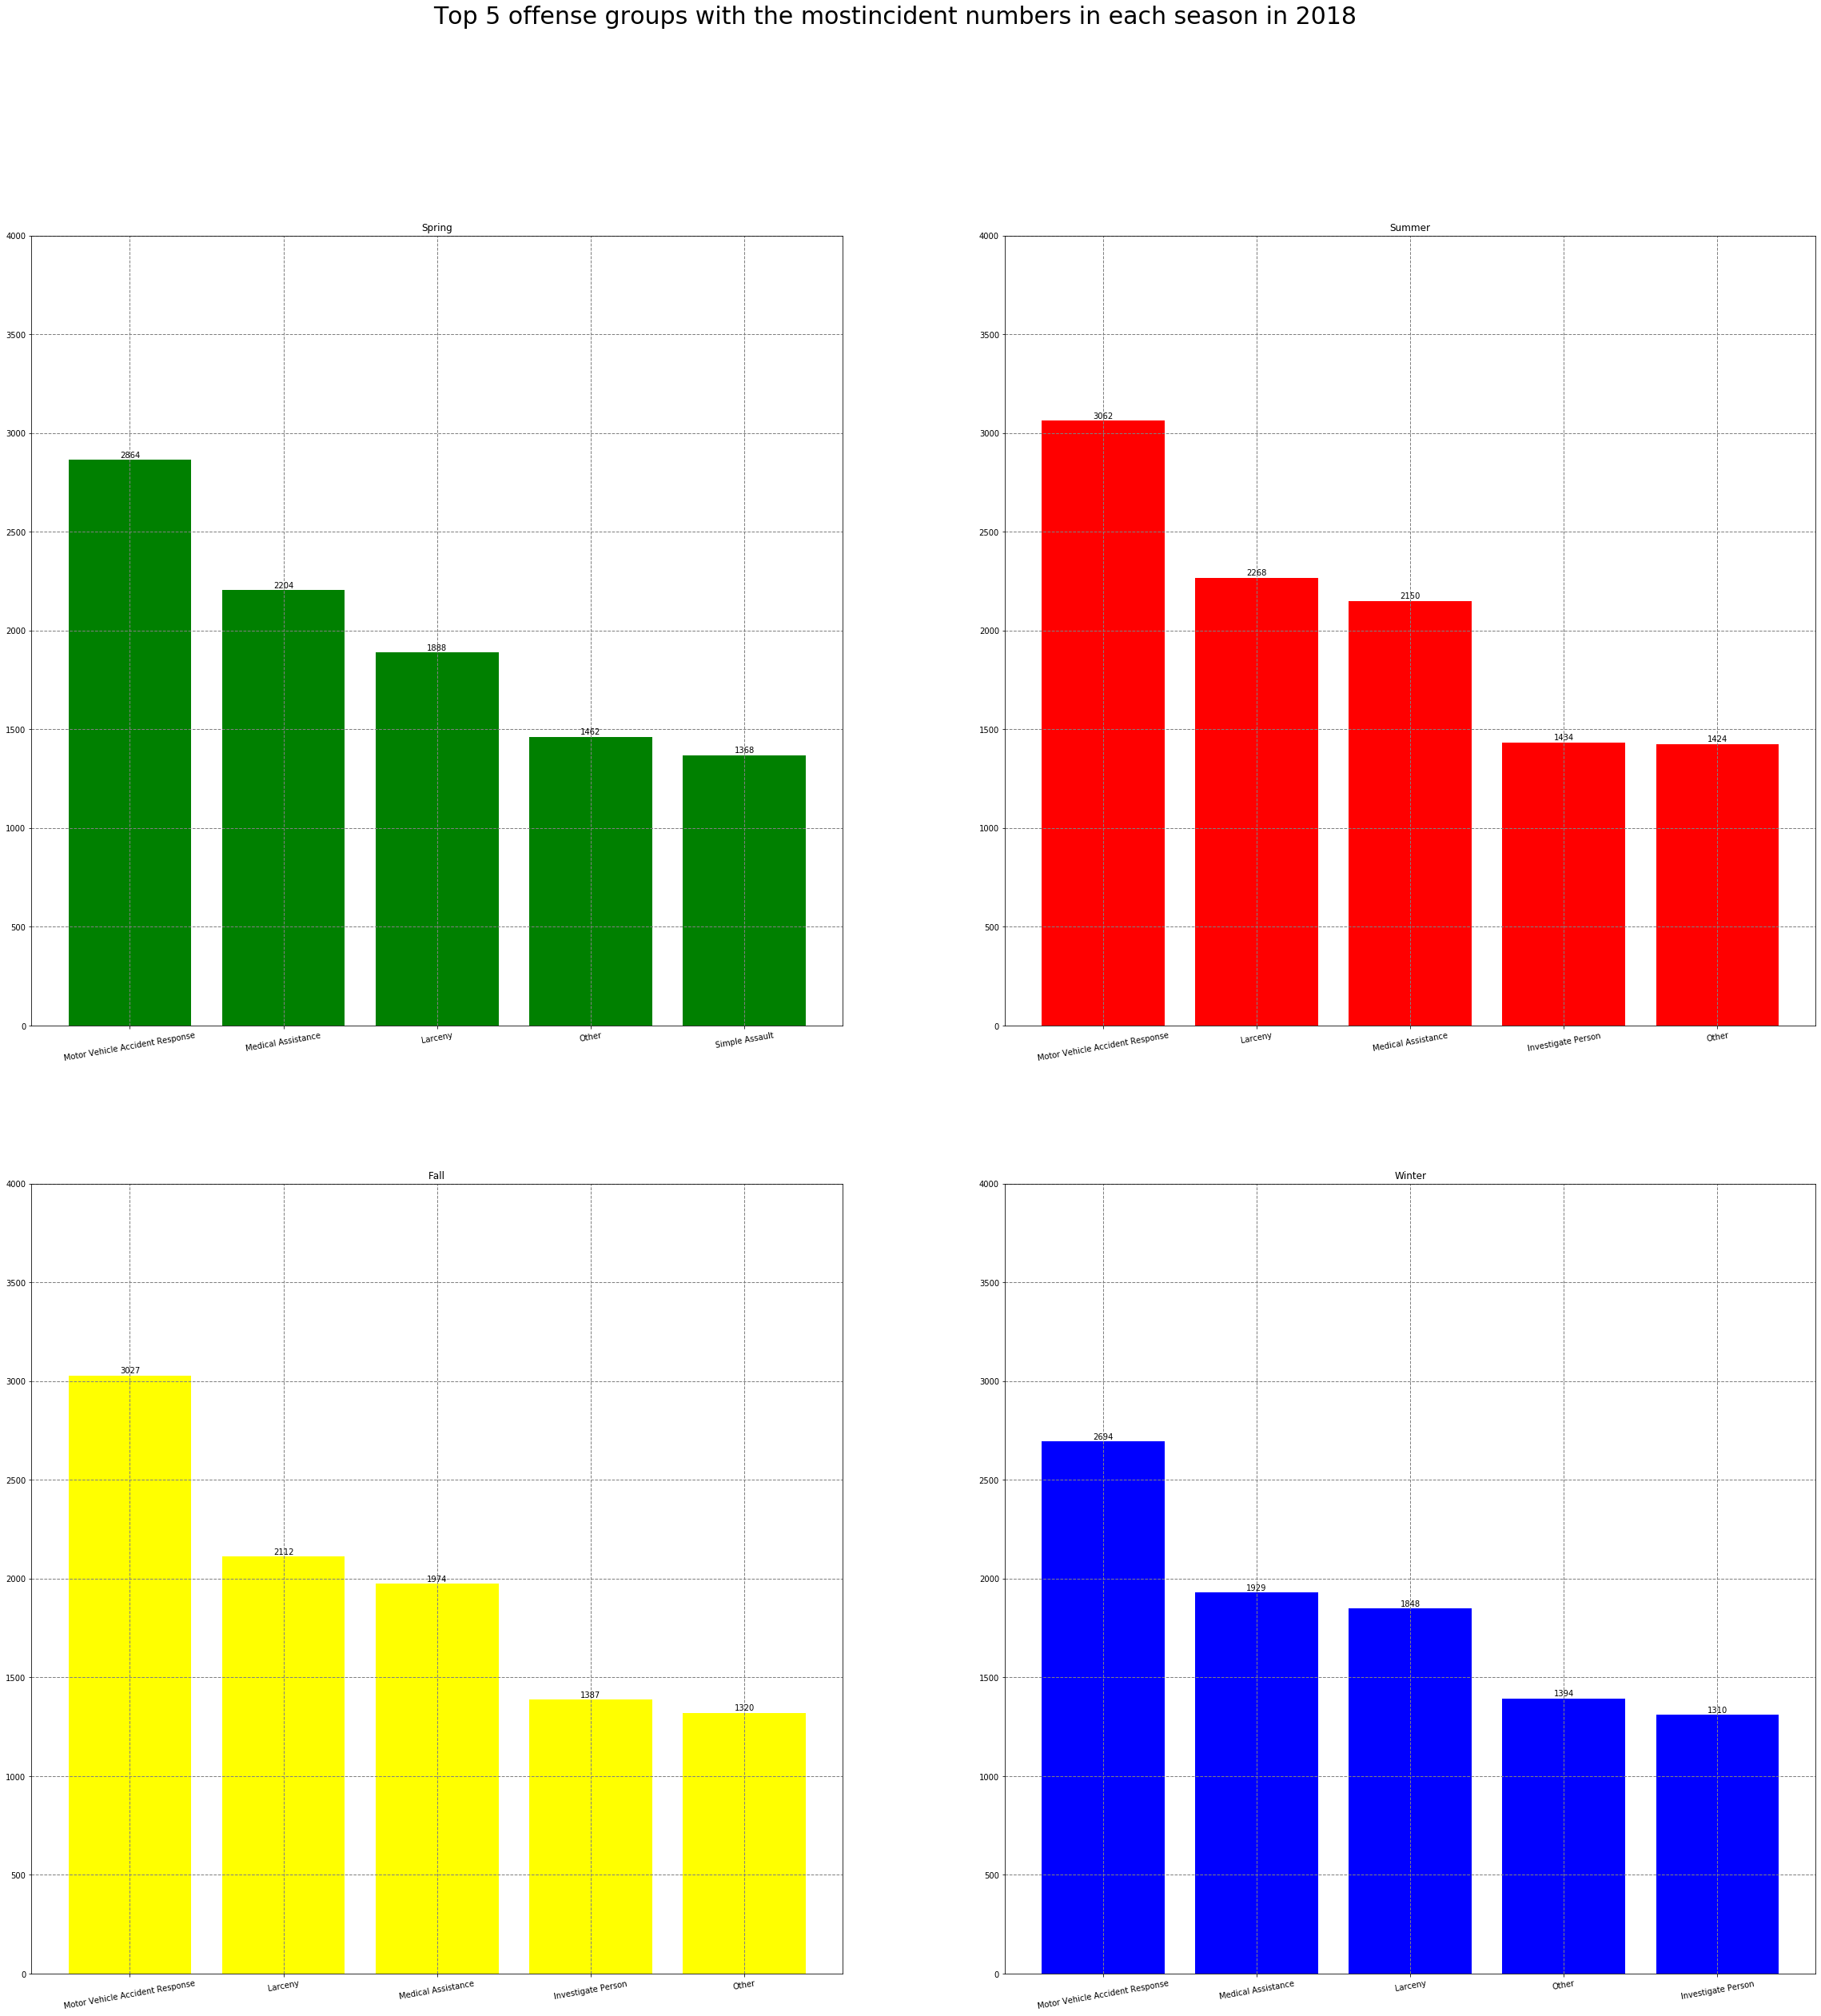

In [10]:
# create the plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(40, 40)
# define the plots as before, for all four 'axes'
ax1.bar(spring_top_5_name, spring_top_5_val, color='green')
ax2.bar(summer_top_5_name, summer_top_5_val, color='red')
ax3.bar(fall_top_5_name, fall_top_5_val, color='yellow')
ax4.bar(winter_top_5_name, winter_top_5_val, color='blue')

ax1.set_title("Spring");
ax1.grid(color='grey', linestyle='--', linewidth=1)
ax1.set_ylim(0, 4000)

ax2.set_title("Summer");
ax2.grid(color='grey', linestyle='--', linewidth=1)
ax2.set_ylim(0, 4000)

ax3.set_title("Fall");
ax3.grid(color='grey', linestyle='--', linewidth=1)
ax3.set_ylim(0, 4000)

ax4.set_title("Winter");
ax4.grid(color='grey', linestyle='--', linewidth=1)
ax4.set_ylim(0, 4000)


for tick in ax1.get_xticklabels():
        tick.set_rotation(10)
for tick in ax2.get_xticklabels():
        tick.set_rotation(10)
for tick in ax3.get_xticklabels():
        tick.set_rotation(10)
for tick in ax4.get_xticklabels():
        tick.set_rotation(10)        

plt.suptitle("Top 5 offense groups with the most incident numbers in each season in 2018", fontsize=30)
setTop(ax1, spring_top_5_val)
setTop(ax2, summer_top_5_val)
setTop(ax3, fall_top_5_val)
setTop(ax4, winter_top_5_val)

> Obvious findindings: 
1. Motor Vehicle Accident Response, Medical Assistance,and Larceny are always the top 3 offense groups with the most incident numbers in each season.
1. Motor Vehicle Accident Response's incident numbers are far beyond other offence groups'.

> **Quesions:**  Why Motor Vehicle Accident Response has the most incident numbers in each season in Boston?

**Research:**


Accoording to one insurance company Allstate’s 'America’s Best Driver Report': Boston drivers are the worst.
1. *The annual survey listed which of the 200 major U.S. cities had the best riders, placing Boston down from No. 199 in 2014 at the bottom of the barrel at No. 200. The study was based on Allstate's review over a two-year period from January 2012 to December 2013 of property damage reports from the 200 major U.S. cities[1].*
1. *While the average U.S. driver experiences a collision every 10 years, about every three years, Boston drivers get an average frequency in one accident. That means that motorists here are more likely to get into a crash by 157.7 percent[1].*

> **Suggestions:** Not only to reduce the work of BPD, but also to protect the safety of drivers and pedestrians. BPD can plan some events about reducing Motor Vehicle Accidents by raising Bostonian drivers' cautiousness of driving. Also, they can cooperate with RMV to test testers' practical cautiousness of driving when they have road tests.

In [11]:
GROUPE = EIGHTEEN.loc[EIGHTEEN['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response',:]
# FALLE = GROUPE.loc[INCIDENTS['MONTH']>8,:]
# EFMVAR = FALLE.loc[INCIDENTS['MONTH']<12,:]
OFFENSE_CODE = GROUPE['OFFENSE_CODE'].values.tolist()
offense_code = {}
for code in OFFENSE_CODE:
    if code in offense_code:
        offense_code[code] +=1
    else:
        offense_code[code] = 1
offense_name = []
offense_count = []
tuples = sorted(offense_code.items(), key=lambda kv: kv[1], reverse=True)
CODES_list = CODES.values.tolist()
code_idx = [idx[0] for idx in CODES_list]

for code in tuples: 
    idx = code_idx.index(code[0])
    offense_name.append(CODES_list[idx][1])
    offense_count.append(code[1])

In [12]:
# Get all the Motor Vehicle Accident Response and find their UCR_PART
INCIDENTS.loc[INCIDENTS['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response',:]['UCR_PART'].describe()

count          49603
unique             1
top       Part Three
freq           49603
Name: UCR_PART, dtype: object

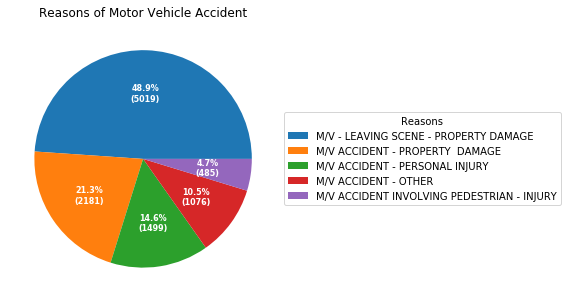

In [13]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# data = [float(x) for x in top5reason_value]
fig.set_size_inches(5,5)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(offense_count[:5], autopct=lambda pct: func(pct, offense_count[:5]),textprops=dict(color="w"))

ax.legend(wedges, offense_name[:5],
          title="Reasons",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Reasons of Motor Vehicle Accident")

plt.show()

The top five offense descriptions of Motor Vehicle Accident that happen most:
- The UCR_PART of all of the Motor Vehicle Accident Response in Boston are 'Part Three', which means those incidents in not criminal offenses(Part One and Part Two)  
    - According to Wikipedia, *The Uniform Crime Reporting (UCR) software, issued by the Federal Bureau of Investigation (FBI), compiles government crime data in the United States. UCR is "a national, collaborative quantitative initiative with about 18,000 local, university and college, county, state, tribal and federal law enforcement agencies jointly reporting to their focus information on crimes"[2]*
- Basically BPD doesn't need to repond to the incident of 'M/V - LEAVING SCENE - PROPERTY DAMAGE' because those incidents only cause a minor property damage and drivers have exchanged their information and call insurance  companies.
- 48.9% and 21.3% of Motor Vehicle Accident are caused by 'M/V - LEAVING SCENE - PROPERTY DAMAGE' and 'M/V ACCIDENT  \- PROPERTY DAMAGE'. Both of them are only PROPERTY DAMAGE. However, there is 14.6% Motor Vehicle Accidents causes people injured and 4.7% Motor Vehicle Accidents causes predesrian injured as well. 
- About 70% of Motor Vehicle Accidents only causes property damage, which about 19% of Motor Vehicle Accidents causes people injured.


> **Suggestions:** BPD can implement activities of first-aid to enable people to take first-aid measures in Motor Vehicle Accidents. It is better for them to cooperate with RMV to add one test for driving license: first-aid test.


In [14]:
# Get all the Larceny and find their UCR_PART
INCIDENTS.loc[INCIDENTS['OFFENSE_CODE_GROUP']=='Larceny',:]['UCR_PART'].describe()

count        34750
unique           1
top       Part One
freq         34750
Name: UCR_PART, dtype: object

> Besides Motor Vehicle Accident, Laceny is also one of the offense groups with the most incident numbers in each seaon. Furthermore,its UCR_PART is Part one, which means criminal offenses
  - Based on Wikipedia,  *In Part I, the UCR indexes reported incidents of index crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes. These are reported via the document named Return A – Monthly Return of Offenses Known to the Police. Part 1 crimes are collectively known as Index crimes, this name is used because the crimes are considered quite serious, tend to be reported more reliably than others, and are reported directly to the police and not to a separate agency (ex- IRS) that doesn't necessarily contribute to the UCR.[2]*
  
  
> Therefore, the following analysis will focus on Laceny

In [15]:
GROUPE = EIGHTEEN.loc[EIGHTEEN['OFFENSE_CODE_GROUP']=='Larceny',:]
OFFENSE_CODE = GROUPE['OFFENSE_CODE'].values.tolist()
offense_code = {}
for code in OFFENSE_CODE:
    if code in offense_code:
        offense_code[code] +=1
    else:
        offense_code[code] = 1
offense_name = []
offense_count = []
tuples = sorted(offense_code.items(), key=lambda kv: kv[1], reverse=True)
CODES_list = CODES.values.tolist()
code_idx = [idx[0] for idx in CODES_list]

for code in tuples: 
    idx = code_idx.index(code[0])
    offense_name.append(CODES_list[idx][1])
    offense_count.append(code[1])

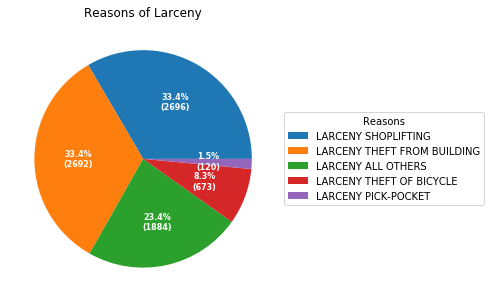

In [16]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
fig.set_size_inches(5,5)
# data = [float(x) for x in top5reason_value]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(offense_count[:5],autopct=lambda pct: func(pct, offense_count[:5]),textprops=dict(color="w"))

ax.legend(wedges, offense_name[:5],
          title="Reasons",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Reasons of Larceny")

plt.show()

The top five offense descriptions of Larceny that happen most:
- 'LARCENY SHOPLIFTING' and 'LARCENY THEFT FROM BUILDING' approximately have the same percentage 33.4%. 
    - LARCENY THEFT FROM BUILDING: *A theft from within a building that is open to the general public and where the offender has legal access[3].*
- The third one is LARCENY ALL OTHERS. Even though it occpies 23.4% of the pie, it needs more materials to understand what are OTHERS.
- The major victims of 'LARCENY SHOPLIFTING' and 'LARCENY THEFT FROM BUILDING'(about 67%) are merchants and the other group of victims of 'LARCENY THEFT OF BICYCLE' and 'LARCENY PICK-POCKET'(about 10%) are indiduals.

> **Suggestions:** It is better for merchants to install surveillance cameras in stores, which can help BPD solve the case quickly by the footage. For individuals, BPD can broadcast to raise individual's vigilance of the safty  of their personal belongings.


- **Relation of Location and crime incident numbers**

Text(0.5, 0.98, 'Top 5 streets hold most incident numbers of Larceny and all offense groups in 2018')

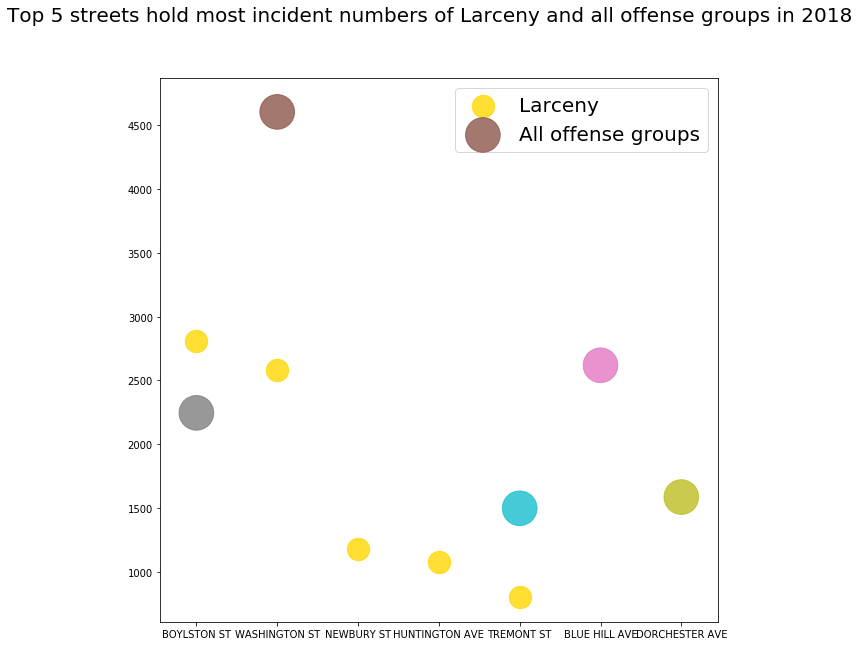

In [17]:
TOP_ACCIDENT=INCIDENTS.loc[INCIDENTS['OFFENSE_CODE_GROUP']=='Larceny','STREET'].values.tolist()
STREETS = EIGHTEEN.loc[:,'STREET'].values.tolist()

fall_area = {}
for s in TOP_ACCIDENT:
    if s in fall_area and type(s)==str:
        fall_area[s]+=1
    else:
        fall_area[s]=1
year_area = {}
for s in STREETS:
    if s in year_area and type(s)==str:
        year_area[s]+=1
    elif type(s)==str:
        year_area[s]=1
fall_area_sorted = sorted(fall_area.items(), key=lambda kv: kv[1], reverse=True)  
year_area_sorted = sorted(year_area.items(), key=lambda kv: kv[1], reverse=True)

X = [x[0]for x in fall_area_sorted[:5]]
Y = [x[1]for x in fall_area_sorted[:5]]

X2 = [x[0]for x in year_area_sorted[:5]]
Y2 = [x[1]for x in year_area_sorted[:5]]

# # create the plo

fig, ax1= plt.subplots(figsize=(10, 10))
ax1.scatter(X, Y, color='gold', alpha =0.8,s=500, label='Larceny')
ax1.scatter(X2, Y2, color=TCOLORS[5:], alpha =0.8,s=1200,label='All offense groups')
# ax1.set_title("Larceny",fontsize=25)

# ax2.scatter(X2, Y2, color=TCOLORS, alpha =1,s=100)
# ax2.set_title("All offense groups",fontsize=25)
plt.legend(fontsize=20)
plt.suptitle("Top 5 streets hold most incident numbers of Larceny and all offense groups in 2018", fontsize=20)
# setTop(ax1, Y)        
# setTop(ax2, Y2)


> - Since Boylston St and Newbury St are both famous shopping areas in Boston, it is understandable that there are plenty of Lareny incident numbers
- Washington st: it is the top one among all offense groups with the most incidents, and it is the second most lareny incident numbers. 
- Top 3 streets with the most offense incident numbers: Washington st, Blue hill ave., Boylston st
- Top 3 streets with the most lancery incident numbers: Boylston st, Washington st, Newbuty st

> Since there are huge amounts of overall crime incidents or lancery incident numbers happened in Washington st, what are the major offense groups in this street?

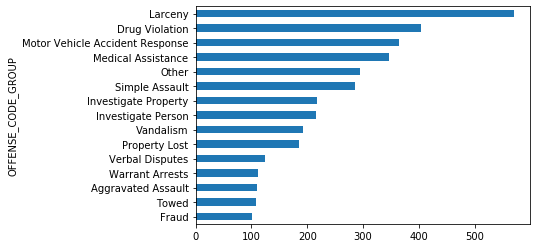

In [18]:
e = EIGHTEEN.loc[EIGHTEEN['STREET']=='WASHINGTON ST',:].groupby('OFFENSE_CODE_GROUP', as_index=False)['INCIDENT_NUMBER'].size().sort_values().tail(15)
plotwt =e.plot(kind = "barh")

> In WASHINGTON ST, top 3 offense groups with the most incident numbers are: Larceny, Drug Violation, and Moto Vehicle Accident Response.
> Larceny and Moto Vehicle Accident Response are also the top two offense groups with the most incident numbers in the Boston. Besides those two, Drug Violation is a new offense group showed up in the project. For the future project, it will be analyzed in details.  

> Combine with the geography and time, will they have some relations about the incident numbers?

In [19]:
WASHINGTON = EIGHTEEN.loc[EIGHTEEN['STREET']=='WASHINGTON ST',:]
BLUEHILL = EIGHTEEN.loc[EIGHTEEN['STREET']=='BLUE HILL AVE',:]
BOYLSTON = EIGHTEEN.loc[EIGHTEEN['STREET']=='BOYLSTON ST',:]
SPRING = [3,4,5]
SUMMER = [6,7,8]
FALL = [9,10,11]
WINTER = [12,1,2]

# df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
# cond1 = df["bin"] == 3    
# cond2 = df["days since"] > 7
# cond3 = ~df["Def"]

# temp2 = df[cond1 & cond2 & cond3]
WASHINGTON_SEASON = [get_season(WASHINGTON, 1)['INCIDENT_NUMBER'].size,
                     get_season(WASHINGTON, 2)['INCIDENT_NUMBER'].size,
                     get_season(WASHINGTON, 3)['INCIDENT_NUMBER'].size,
                     get_season(WASHINGTON, 4)['INCIDENT_NUMBER'].size]
BLUEHILL_SEASON = [get_season(BLUEHILL, 1)['INCIDENT_NUMBER'].size,
                   get_season(BLUEHILL, 2)['INCIDENT_NUMBER'].size,
                   get_season(BLUEHILL, 3)['INCIDENT_NUMBER'].size,
                   get_season(BLUEHILL, 4)['INCIDENT_NUMBER'].size]

BOYLSTON_SEASON = [get_season(BOYLSTON, 1)['INCIDENT_NUMBER'].size,
                   get_season(BOYLSTON, 2)['INCIDENT_NUMBER'].size,
                   get_season(BOYLSTON, 3)['INCIDENT_NUMBER'].size,
                   get_season(BOYLSTON, 4)['INCIDENT_NUMBER'].size]
WASHINGTON_SEASON
BLUEHILL_SEASON
BOYLSTON_SEASON

[573, 572, 595, 506]

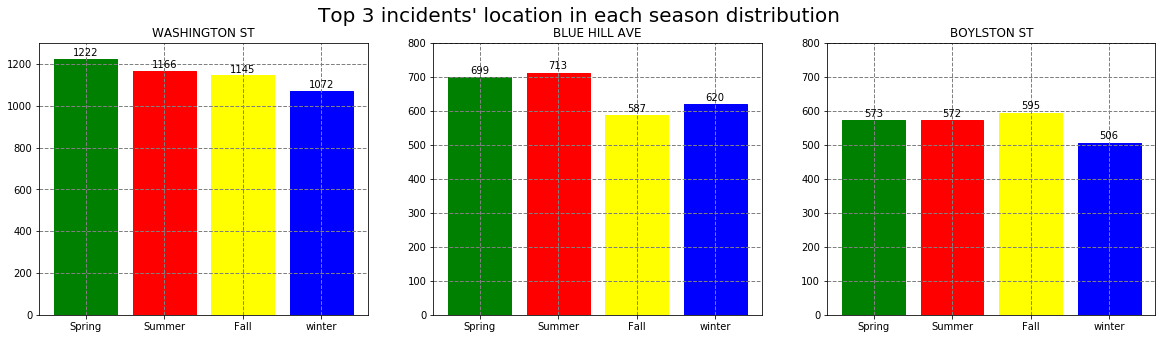

In [42]:
seasonName = ['Spring', 'Summer', 'Fall', "winter"]


X = [1, 2, 3, 4]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(20,5))

# define the plots as before, for all four 'axes'
ax1.bar(seasonName, WASHINGTON_SEASON, color='green')
ax2.bar(seasonName, BLUEHILL_SEASON, color='red')
ax3.bar(seasonName, BOYLSTON_SEASON, color='yellow')
# ax4.bar(seasonName, Allston_Brighton.values(), color='blue')

bar1 = ax1.bar(seasonName, WASHINGTON_SEASON)
bar1[0].set_color('green')
bar1[1].set_color('red')
bar1[2].set_color('yellow')
bar1[3].set_color('blue')

ax1.set_title("WASHINGTON ST");
ax1.grid(color='grey', linestyle='--', linewidth=1)
ax1.set_ylim(0, 1300)

bar2 = ax2.bar(seasonName, BLUEHILL_SEASON)
bar2[0].set_color('green')
bar2[1].set_color('red')
bar2[2].set_color('yellow')
bar2[3].set_color('blue')

ax2.set_title("BLUE HILL AVE");
ax2.grid(color='grey', linestyle='--', linewidth=1)
ax2.set_ylim(0, 800)


bar3 = ax3.bar(seasonName, BOYLSTON_SEASON)
bar3[0].set_color('green')
bar3[1].set_color('red')
bar3[2].set_color('yellow')
bar3[3].set_color('blue')

ax3.set_title("BOYLSTON ST");
ax3.grid(color='grey', linestyle='--', linewidth=1)
ax3.set_ylim(0, 800)

plt.suptitle("Top 3 incidents' location in each season distribution", fontsize=20);
setTop(ax1, WASHINGTON_SEASON)
setTop(ax2, BLUEHILL_SEASON)
setTop(ax3, BOYLSTON_SEASON)


> - Each street has different pattern of the crime incident numbers in each season.
- Compare to Washington street and Boylston street, each season's incident numbers in Washington street is twice as the one in Boylston street. 

> **Suggestions:** BPD should deploy more police in Washington st.

### Conclusion
1. **Relation of time and crime incident numbers**
    1. **Months:** 
        - From May to October, there are always more than 8000 incidents monthly
        - February is always the month with the least crime incident numbers
    1. **Seasons:** Summer is the season which has the most incident numbers and Winter is the one with least incident numbers.
    1. **Day of week:** 
         - The day of Friday in Spring, Summer, and Fall occurs more incidents. And the day of Monday in Winter occurs more incidents.
         - Generally, there is less incidents happen from Tuseday to Thursday in each season.
1. **Relation of offense group and crime incident numbers**
    1. Motor Vehicle Accident Response, Medical Assistance,and Larceny are always the top 3 offence group with most incident numbers in each season.
    1. Motor Vehicle Accident Response's incident numbers are far beyond other offence groups'.
        - About 70% of Motor Vehicle Accidents only causes property damage, which about 19% of Motor Vehicle Accidents only causes people injured.
    1. Larceny:
        - The major victims of 'LARCENY SHOPLIFTING' and 'LARCENY THEFT FROM BUILDING'(about 67%) are merchants and the other group of victims of 'LARCENY THEFT OF BICYCLE' and 'LARCENY PICK-POCKET'(about 10%) are indiduals.
1. **Relation of location and crime incident numbers**
    1. Washington st: it is the top one among all offense groups with the most incidents, and it is the second most lareny incident numbers. 
        - top 3 offense groups with the most incident numbers are: Larceny, Drug Violation, and Moto Vehicle Accident Response.
        - Compare to Washington street(top 1) and Boylston street(top 3), each season's incident numbers in Washington street is twice as the one in Boylston street.
    1. Top 3 streets with the most offense incident numbers: Washington st, Blue hill ave., Boylston st
    1. Top 3 streets with the most lancery incident numbers: Boylston st, Washington st, Newbuty st
    1. Each street has different pattern of the crime incident numbers in each season.

> **Recommendations:**
   1. BPD can deply more police from May to October, and less in February. (The vocation  of the police can be more flexible in February)
   1. BPD can reasonably deploy the police resources to avoid wasting the police or the shortage of the police on the crime scene by on day of week and seasons.
   1. BPD can cooperate with RMV and hold some activities for Boston drivers
    
**Limitation of the project**

1. There is some Hypotheses mentioned in the project, it will be better to analyze them
1. Limitation of years, get more data of other years or 2019, will make the conclusion more persuasive.

### References

1. Hofherr, Justine. “Bostonians Crash More than Twice as Often as the Average Driver.” Boston.com, The Boston Globe, 3 Sept. 2015, www.boston.com/cars/news-and-reviews/2015/09/03/bostonians-crash-more-than-twice-as-often-as-the-average-driver.

1. “Uniform Crime Reports.” Wikipedia, Wikimedia Foundation, 1 Oct. 2019, en.wikipedia.org/wiki/Uniform_Crime_Reports.

1. “Larceny-Theft.” Justia, www.justia.com/criminal/docs/uniform-crime-reporting-handbook/larceny-theft/.

1. “Crime Incident Reports (August 2015 - To Date) (Source: New System).” Analyze Boston, data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system.